In [326]:
import numpy as np
from scipy.linalg import expm
import matplotlib.pyplot as plt

In [327]:
np.set_printoptions(suppress=True)
np.set_printoptions(precision=3)

In [328]:
# Values = [10, 2]
Values = [10, 5]
Weights = [1, 2]
# Weights = [2, 3]
Ancil = [1, 2]

# alpha = 100  # this gave best accuracy so far!
alpha = 100
beta = 4.01
gamma = max(Values) + 1
T = 1
t_axis = np.arange(0, T, 0.01)

In [329]:
sigmaI = np.array(
    [
        [1, 0],
        [0, 1],
    ]
)
sigmaX = np.array(
    [
        [0, 1],
        [1, 0],
    ]
)
sigmaBin = np.array(
    [
        [0, 0],
        [0, 1],
    ]
)

In [330]:
# H0 = np.zeros((2**(len(Values) + len(Ancil)), 2**(len(Values) + len(Ancil))))
H0 = np.kron(np.kron(np.kron(sigmaX, sigmaI), sigmaI), sigmaI) + np.kron(np.kron(np.kron(sigmaI, sigmaX), sigmaI), sigmaI) + np.kron(np.kron(np.kron(sigmaI, sigmaI), sigmaX), sigmaI) + np.kron(np.kron(np.kron(sigmaI, sigmaI), sigmaI), sigmaX)
# print(H0)

eigenvals_H0, eigenvecs_H0 = np.linalg.eigh(H0)
ground_idx_H0 = eigenvals_H0.argsort()[0]
print(eigenvals_H0[ground_idx_H0])
print(eigenvecs_H0[:, ground_idx_H0])

-4.000000000000003
[ 0.25 -0.25 -0.25  0.25 -0.25  0.25  0.25 -0.25 -0.25  0.25  0.25 -0.25
  0.25 -0.25 -0.25  0.25]


In [331]:
Hp = (
    - (Values[0] * np.kron(np.kron(np.kron(sigmaBin, sigmaI), sigmaI), sigmaI) + Values[1] * np.kron(np.kron(np.kron(sigmaI, sigmaBin), sigmaI), sigmaI))
    + gamma * (
        (Weights[0] * np.kron(np.kron(np.kron(sigmaBin, sigmaI), sigmaI), sigmaI) + Weights[1] * np.kron(np.kron(np.kron(sigmaI, sigmaBin), sigmaI), sigmaI))
      - (Ancil[0] * np.kron(np.kron(np.kron(sigmaI, sigmaI), sigmaBin), sigmaI) + Ancil[1] * np.kron(np.kron(np.kron(sigmaI, sigmaI), sigmaI), sigmaBin))
    )**2
)
# print(Hp)

eigenvals_Hp, eigenvecs_Hp = np.linalg.eigh(Hp)
ground_idx_Hp = eigenvals_Hp.argsort()[0]
print(eigenvals_Hp[ground_idx_Hp])
print(eigenvecs_Hp[:, ground_idx_Hp])


-15.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [332]:
def H(t):
    return alpha * ( (1 - t/T)*beta*H0 + (t/T)*Hp )

# print(H(0))
# print(H(T))

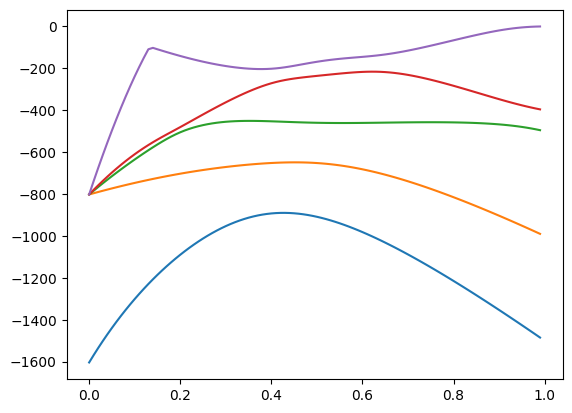

In [333]:
instant_eigenvals = []
for t in t_axis:
    eigenvals, eigenvecs = np.linalg.eigh(H(t))
    instant_eigenvals.append(eigenvals[eigenvals.argsort()[0:5]])

# print(instant_eigenvals)
plt.plot(t_axis, instant_eigenvals)

In [334]:
int_H_T = 0.5 * alpha * T * (beta*H0 + Hp)

In [335]:
U = expm(-1j * int_H_T)
# print(U.conjugate().transpose() @ U)

In [336]:
psi_ini = eigenvecs_H0[:, ground_idx_H0]
print(psi_ini)
print(np.linalg.norm(psi_ini))

[ 0.25 -0.25 -0.25  0.25 -0.25  0.25  0.25 -0.25 -0.25  0.25  0.25 -0.25
  0.25 -0.25 -0.25  0.25]
1.0000000000000004


In [337]:
psi_final = U @ psi_ini
print(psi_final)
print(np.linalg.norm(psi_final))

[ 0.109-0.216j -0.217+0.056j  0.063+0.106j  0.193+0.071j -0.115-0.13j
  0.132+0.14j  -0.146-0.11j   0.111+0.034j -0.074+0.192j -0.2  +0.001j
 -0.002-0.42j   0.085-0.145j -0.145+0.144j  0.175-0.144j  0.203+0.066j
 -0.388-0.379j]
1.000000000000025


In [338]:
psi_correct = eigenvecs_Hp[:, ground_idx_Hp]
print(psi_correct)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [339]:
def int_H(t):
    return 0.5 * alpha * t / T * (2 * beta * H0*T + (-beta * H0 + Hp)*t )

def Unitary(t):
    return expm(-1j * int_H(t))

In [340]:
int_H(T) - int_H_T

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,

In [341]:
int_H(T)

array([[   0. ,  200.5,  200.5,    0. ,  200.5,    0. ,    0. ,    0. ,
         200.5,    0. ,    0. ,    0. ,    0. ,    0. ,    0. ,    0. ],
       [ 200.5, 2200. ,    0. ,  200.5,    0. ,  200.5,    0. ,    0. ,
           0. ,  200.5,    0. ,    0. ,    0. ,    0. ,    0. ,    0. ],
       [ 200.5,    0. ,  550. ,  200.5,    0. ,    0. ,  200.5,    0. ,
           0. ,    0. ,  200.5,    0. ,    0. ,    0. ,    0. ,    0. ],
       [   0. ,  200.5,  200.5, 4950. ,    0. ,    0. ,    0. ,  200.5,
           0. ,    0. ,    0. ,  200.5,    0. ,    0. ,    0. ,    0. ],
       [ 200.5,    0. ,    0. ,    0. , 1950. ,  200.5,  200.5,    0. ,
           0. ,    0. ,    0. ,    0. ,  200.5,    0. ,    0. ,    0. ],
       [   0. ,  200.5,    0. ,    0. ,  200.5, -250. ,    0. ,  200.5,
           0. ,    0. ,    0. ,    0. ,    0. ,  200.5,    0. ,    0. ],
       [   0. ,    0. ,  200.5,    0. ,  200.5,    0. ,  300. ,  200.5,
           0. ,    0. ,    0. ,    0. ,    0. ,    0. ,  2

In [342]:
H(T)

array([[    0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.],
       [    0.,  4400.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.],
       [    0.,     0.,  1100.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.],
       [    0.,     0.,     0.,  9900.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.],
       [    0.,     0.,     0.,     0.,  3900.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.],
       [    0.,     0.,     0.,     0.,     0.,  -500.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.],
       [    0.,     0.,     0.,     0.,     0.,     0.,   600.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,   

In [343]:
Unitary(T)

array([[ 0.115-0.242j,  0.11 +0.014j, -0.234+0.192j,  0.01 -0.02j ,
        -0.019+0.084j,  0.176-0.01j ,  0.358+0.074j, -0.161+0.299j,
        -0.055+0.375j, -0.385-0.129j, -0.037+0.039j,  0.058+0.017j,
        -0.004+0.003j,  0.094-0.449j, -0.039-0.03j , -0.041-0.079j],
       [ 0.11 +0.014j,  0.952-0.049j,  0.007-0.046j, -0.005+0.033j,
         0.085-0.141j,  0.057-0.07j , -0.026-0.019j,  0.043-0.005j,
         0.083-0.009j,  0.152-0.035j,  0.019+0.011j,  0.005-0.024j,
        -0.017+0.014j,  0.022+0.038j, -0.005-0.008j,  0.032+0.034j],
       [-0.234+0.192j,  0.007-0.046j, -0.315+0.61j ,  0.057-0.021j,
         0.036-0.077j,  0.007+0.138j,  0.062+0.402j,  0.02 +0.218j,
         0.076-0.112j,  0.208+0.106j, -0.055+0.2j  , -0.015-0.029j,
        -0.006+0.005j,  0.041+0.22j , -0.044-0.143j,  0.022+0.044j],
       [ 0.01 -0.02j , -0.005+0.033j,  0.057-0.021j,  0.93 +0.342j,
        -0.009+0.012j,  0.006+0.005j, -0.002-0.012j,  0.063+0.025j,
        -0.015-0.005j, -0.011-0.002j,  0.001-

In [344]:
Unitary(T).conjugate().transpose() @ Unitary(T)

array([[ 1.-0.j, -0.+0.j, -0.+0.j,  0.-0.j,  0.+0.j, -0.+0.j,  0.-0.j,
         0.+0.j, -0.-0.j,  0.-0.j, -0.-0.j, -0.+0.j,  0.-0.j, -0.+0.j,
        -0.+0.j,  0.+0.j],
       [-0.-0.j,  1.-0.j, -0.-0.j,  0.-0.j, -0.+0.j, -0.-0.j, -0.-0.j,
        -0.+0.j, -0.+0.j, -0.+0.j, -0.+0.j, -0.-0.j,  0.+0.j, -0.-0.j,
         0.+0.j,  0.+0.j],
       [-0.-0.j, -0.+0.j,  1.-0.j,  0.+0.j,  0.-0.j,  0.-0.j,  0.+0.j,
         0.-0.j, -0.-0.j,  0.-0.j, -0.-0.j, -0.+0.j, -0.+0.j,  0.-0.j,
         0.-0.j,  0.-0.j],
       [ 0.+0.j,  0.+0.j,  0.-0.j,  1.+0.j,  0.-0.j,  0.-0.j,  0.+0.j,
         0.+0.j, -0.+0.j,  0.-0.j,  0.-0.j,  0.-0.j, -0.-0.j,  0.-0.j,
         0.-0.j,  0.-0.j],
       [ 0.-0.j, -0.-0.j,  0.+0.j,  0.+0.j,  1.+0.j,  0.-0.j,  0.-0.j,
         0.-0.j, -0.+0.j, -0.+0.j, -0.+0.j,  0.-0.j, -0.+0.j,  0.-0.j,
        -0.-0.j,  0.+0.j],
       [-0.-0.j, -0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  1.+0.j, -0.+0.j,
        -0.-0.j,  0.-0.j, -0.+0.j,  0.-0.j,  0.-0.j, -0.-0.j,  0.+0.j,
         0.+0

In [345]:
psi_ini = eigenvecs_H0[:, ground_idx_H0]
# print(psi_ini)
# print(np.linalg.norm(psi_ini))

psi_correct = eigenvecs_Hp[:, ground_idx_Hp]
# print(psi_correct)

# psi_t_list = []
energy_expectation_t_list = []
psi_t_list = []

for t in t_axis:
    psi_t = Unitary(t) @ psi_ini
    # print(psi_t)
    # print(np.linalg.norm(psi_t))
    energy_expectation_t_list.append(psi_t.conjugate().transpose() @ H(t) @ psi_t)
    psi_t_list.append(psi_t)

print(energy_expectation_t_list)
for psi_t in psi_t_list:
    print(psi_t, sep="\n")

[np.complex128(-1604.0000000000011+0j), np.complex128(-1568.5633910235642+1.4210854715202004e-14j), np.complex128(-1532.830242713918+0j), np.complex128(-1497.3459257391535+0j), np.complex128(-1466.79600807948+5.684341886080802e-14j), np.complex128(-1437.3449437187996+0j), np.complex128(-1398.9367992557004+5.684341886080802e-14j), np.complex128(-1362.7336243291106+0j), np.complex128(-1326.348996297826-5.684341886080802e-14j), np.complex128(-1291.158344050241-5.684341886080802e-14j), np.complex128(-1272.7398471546467-5.684341886080802e-14j), np.complex128(-1255.7518367766015+0j), np.complex128(-1237.5600590895208+0j), np.complex128(-1178.1482762452183-5.684341886080802e-14j), np.complex128(-1110.2842210104059+0j), np.complex128(-1160.7897147992394+0j), np.complex128(-1084.984665381505+1.4210854715202004e-14j), np.complex128(-1059.7915815929416-7.105427357601002e-15j), np.complex128(-1040.5364353078369+0j), np.complex128(-1006.9040226392015+7.105427357601002e-15j), np.complex128(-973.3113

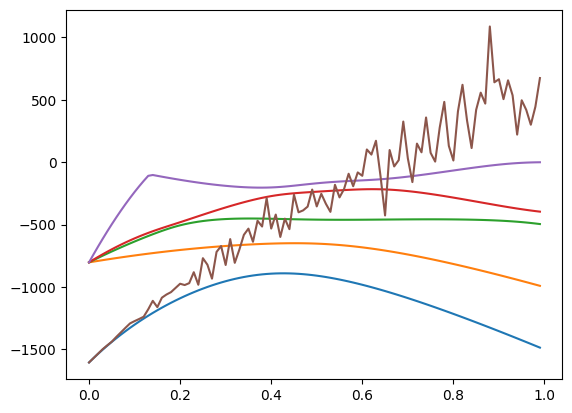

In [346]:
instant_eigenvals = []

for t in t_axis:
    eigenvals, eigenvecs = np.linalg.eigh(H(t))
    instant_eigenvals.append(eigenvals[eigenvals.argsort()[0:5]])

# print(instant_eigenvals)
plt.plot(t_axis, instant_eigenvals)
plt.plot(t_axis, energy_expectation_t_list)

In [347]:
accuracy_list = []
beta_list = np.arange(0, 15, 0.01)

for beta in beta_list:
    int_H_T = 0.5 * alpha * T * (beta*H0 + Hp)
    U = expm(-1j * int_H_T)

    psi_final = U @ psi_ini
    # print(psi_final)
    # print(psi_final.conjugate().transpose() @ psi_final)
    accuracy = np.abs(np.dot(psi_correct, psi_final))**2
    # print(accuracy)
    accuracy_list.append(accuracy)
    
accuracy_list = np.array(accuracy_list)

Text(0, 0.5, 'accuracy')

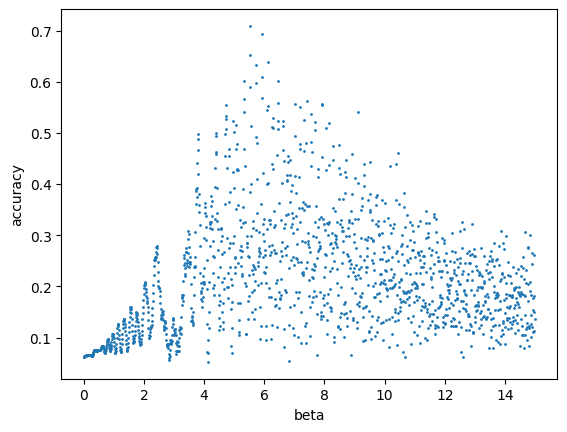

In [348]:
plt.scatter(beta_list, accuracy_list, s=1)
plt.xlabel("beta")
plt.ylabel("accuracy")

In [349]:
max(accuracy_list)

np.float64(0.7089467485800532)

In [350]:
beta_list[accuracy_list.argmax()]

np.float64(5.53)